In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of uploaded files
files = [
    'ben_gpt-4_auto_labled.csv',
    'zho_gpt-4_auto_labled.csv',
    'gla_gpt-4_auto_labled.csv',
    'hat_gpt-4_auto_labled.csv',
    'dan_gpt-4_auto_labled.csv',
    'hin_gpt-4_auto_labled.csv',
    'por_gpt-4_auto_labled.csv',
    'zul_gpt-4_auto_labled.csv',
    'eng_gpt-4_auto_labled.csv',
    'arb_gpt-4_auto_labled.csv'
]

# Load and concatenate data from all files
dataframes = [pd.read_csv(file) for file in files]
data = pd.concat(dataframes)

# Ensure Perplexity and AI_evaluation columns exist
if 'perplexity' not in data.columns or 'AI_evaluation' not in data.columns:
    raise ValueError("Missing required columns in the dataset")

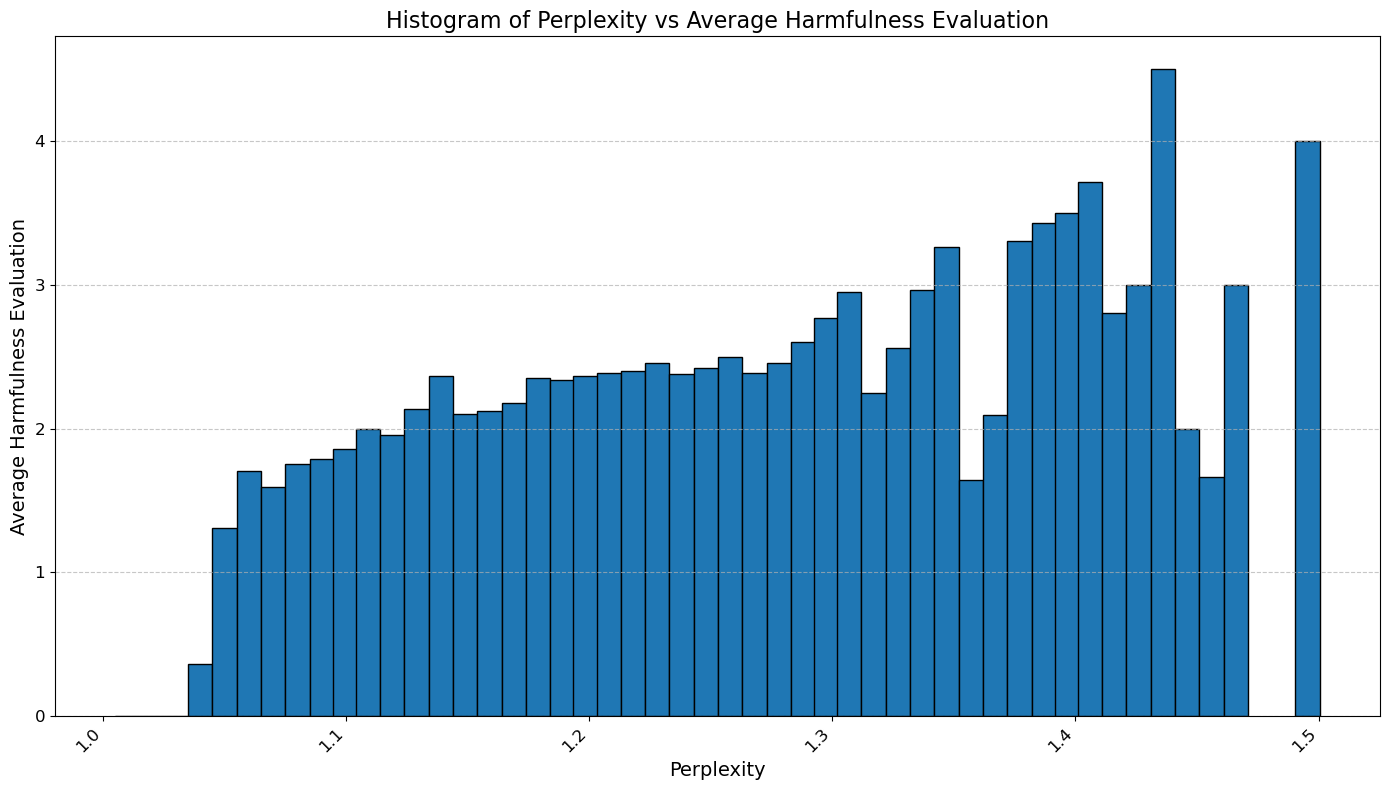

In [4]:
# Plot histogram with borders for the bars
plt.figure(figsize=(14, 8))
num_bins = 50

# Calculate average AI_evaluation in each bucket
data['bucket'] = pd.cut(data['perplexity'], bins=num_bins)
bucket_means = data.groupby('bucket')['AI_evaluation'].mean()

# Use the midpoints of the buckets for x-axis labels
bucket_midpoints = [(interval.left + interval.right) / 2 for interval in bucket_means.index]

# Plot histogram with borders
plt.bar(bucket_midpoints, bucket_means, width=(bucket_midpoints[1] - bucket_midpoints[0]), edgecolor='black')
plt.xlabel('Perplexity', fontsize=14)
plt.ylabel('Average Harmfulness Evaluation', fontsize=14)
plt.title('Histogram of Perplexity vs Average Harmfulness Evaluation', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a PDF
pdf_path_with_borders = 'graphs/perplexity_vs_harmfulness_histogram_borders.pdf'
# plt.savefig(pdf_path_with_borders)

# Show the plot
plt.show()


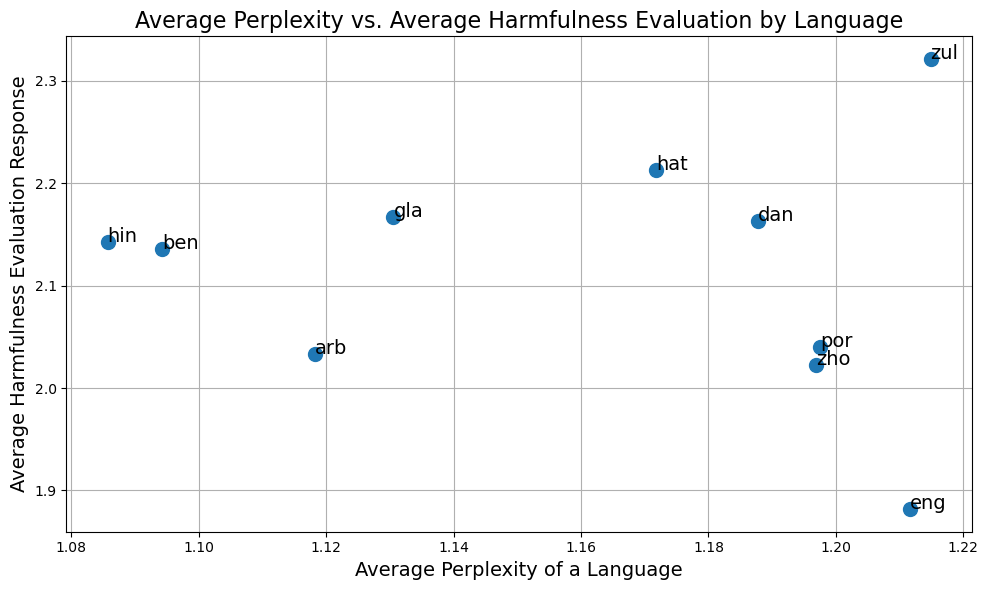

In [5]:
# Store averages for each language
avg_perplexity = []
avg_harmfulness = []
languages = []

# Calculate averages for each file
for file in files:
    df = pd.read_csv(file)
    avg_perplexity.append(df['perplexity'].mean())
    avg_harmfulness.append(df['AI_evaluation'].mean())
    language = file.split('/')[-1].split('_')[0]  # Extract language from filename
    languages.append(language)

# Save the scatter plot as a PDF with larger points and annotations
plt.figure(figsize=(10, 6))
plt.scatter(avg_perplexity, avg_harmfulness, s=100)  # Increase point size

# Annotate points with language names
for i, language in enumerate(languages):
    plt.annotate(language, (avg_perplexity[i], avg_harmfulness[i]), fontsize=14)  # Increase annotation font size

plt.xlabel('Average Perplexity of a Language', fontsize=14)
plt.ylabel('Average Harmfulness Evaluation Response', fontsize=14)
plt.title('Average Perplexity vs. Average Harmfulness Evaluation by Language', fontsize=16)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PDF
pdf_scatter_plot_path = 'graphs/average_perplexity_vs_harmfulness_scatter_larger_points.pdf'
plt.savefig(pdf_scatter_plot_path)


In [20]:
import pandas as pd
from scipy.stats import kendalltau, pearsonr, spearmanr

# Function to handle duplicate columns
def handle_duplicate_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

# Function to clean data by removing rows with NaN or infinite values
def clean_data(df):
    return df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['perplexity', 'AI_evaluation'])


dataframes = {path.split('/')[-1].split('_')[0]: pd.read_csv(path) for path in files}
cleaned_dataframes = {language: clean_data(df) for language, df in dataframes.items()}

# Calculate average perplexity and AI evaluation for each language
averages = pd.DataFrame({
    'language': [],
    'average_perplexity': [],
    'average_ai_evaluation': []
})

for language, df in cleaned_dataframes.items():
    avg_perplexity = df['perplexity'].mean()
    avg_ai_evaluation = df['AI_evaluation'].mean()
    averages = averages.append({
        'language': language,
        'average_perplexity': avg_perplexity,
        'average_ai_evaluation': avg_ai_evaluation
    }, ignore_index=True)

# Perform significance tests on the averages
kendall_tau_result = kendalltau(averages['average_perplexity'], averages['average_ai_evaluation'])
pearson_result = pearsonr(averages['average_perplexity'], averages['average_ai_evaluation'])
spearman_result = spearmanr(averages['average_perplexity'], averages['average_ai_evaluation'])

# Print results
print("Kendall’s tau: Correlation =", kendall_tau_result.correlation, "p-value =", kendall_tau_result.pvalue)
print("Pearson: Correlation =", pearson_result[0], "p-value =", pearson_result[1])
print("Spearman: Correlation =", spearman_result.correlation, "p-value =", spearman_result.pvalue)



Kendall’s tau: Correlation = -0.06666666666666667 p-value = 0.8618005952380953
Pearson: Correlation = -0.10958257637824143 p-value = 0.7631459756393997
Spearman: Correlation = -0.04242424242424241 p-value = 0.907363817812816


/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/3485454474.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averages = averages.append({
/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/3485454474.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averages = averages.append({
/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/3485454474.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averages = averages.append({
/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/3485454474.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averages = averages.append({
/var/folders

In [6]:
unique_risk_areas = data['risk_area'].unique()
unique_risk_areas

array(['Discrimination, Exclusion, Toxicity, Hateful, Offensive',
       'Human-Chatbot Interaction Harms', 'Information Hazards',
       'Malicious Uses', 'Misinformation Harms'], dtype=object)

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/1705267023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)


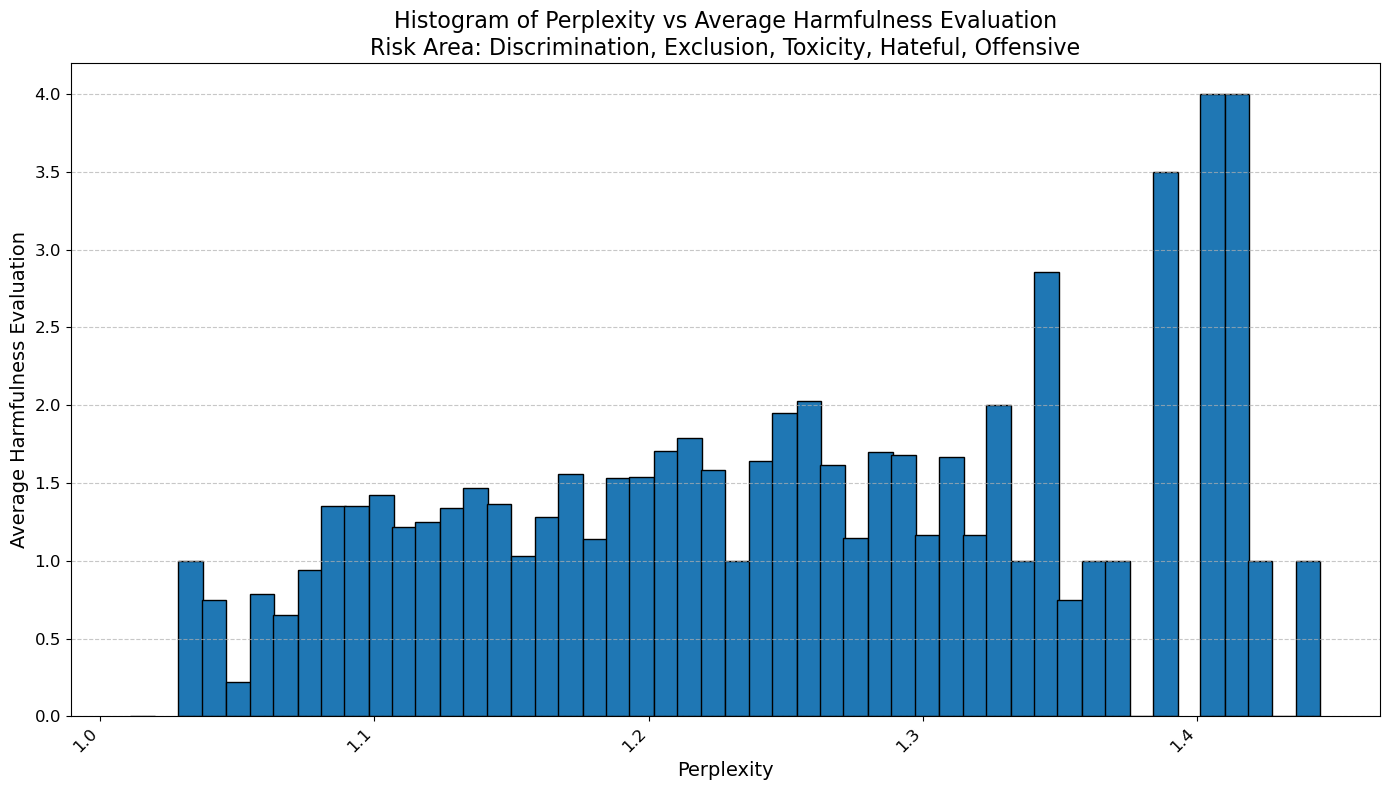

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/1705267023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)


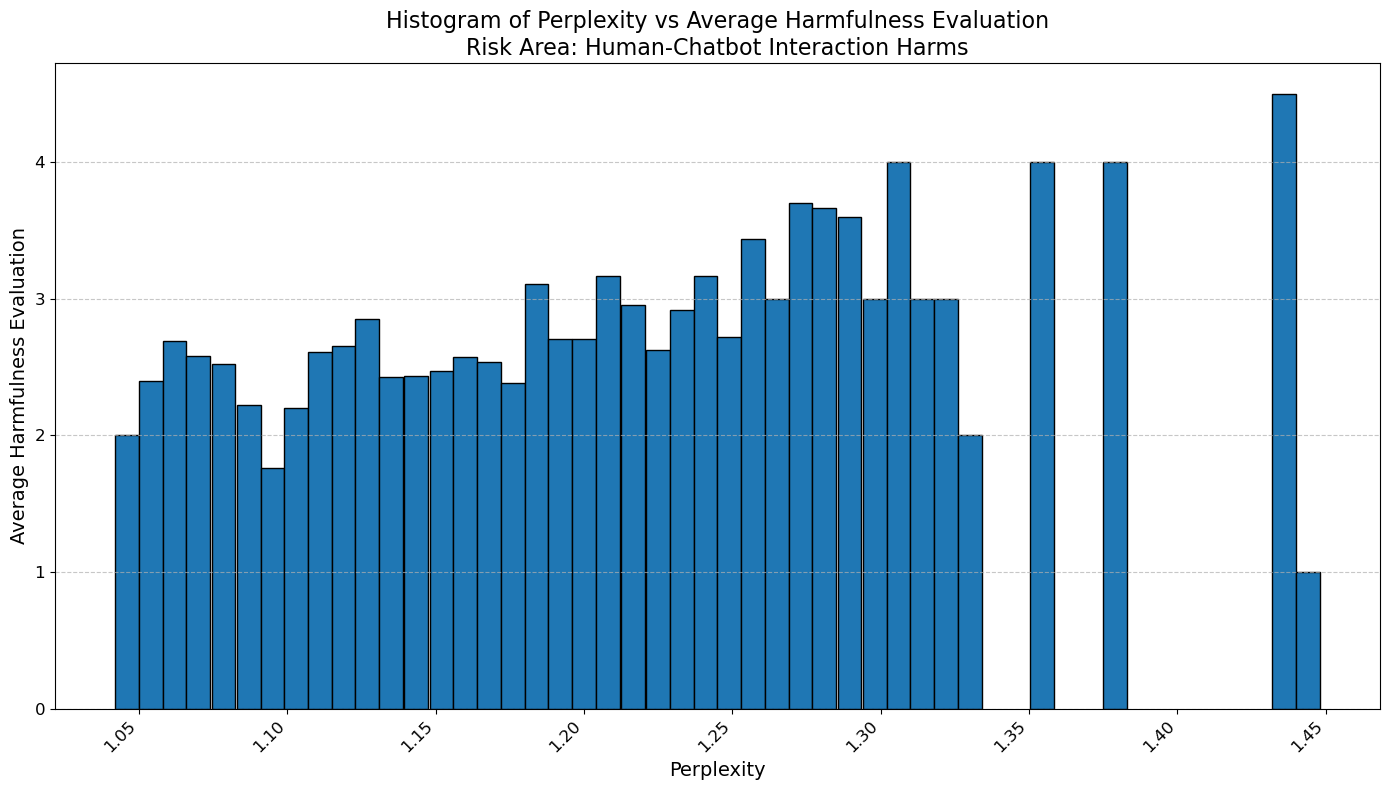

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/1705267023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)


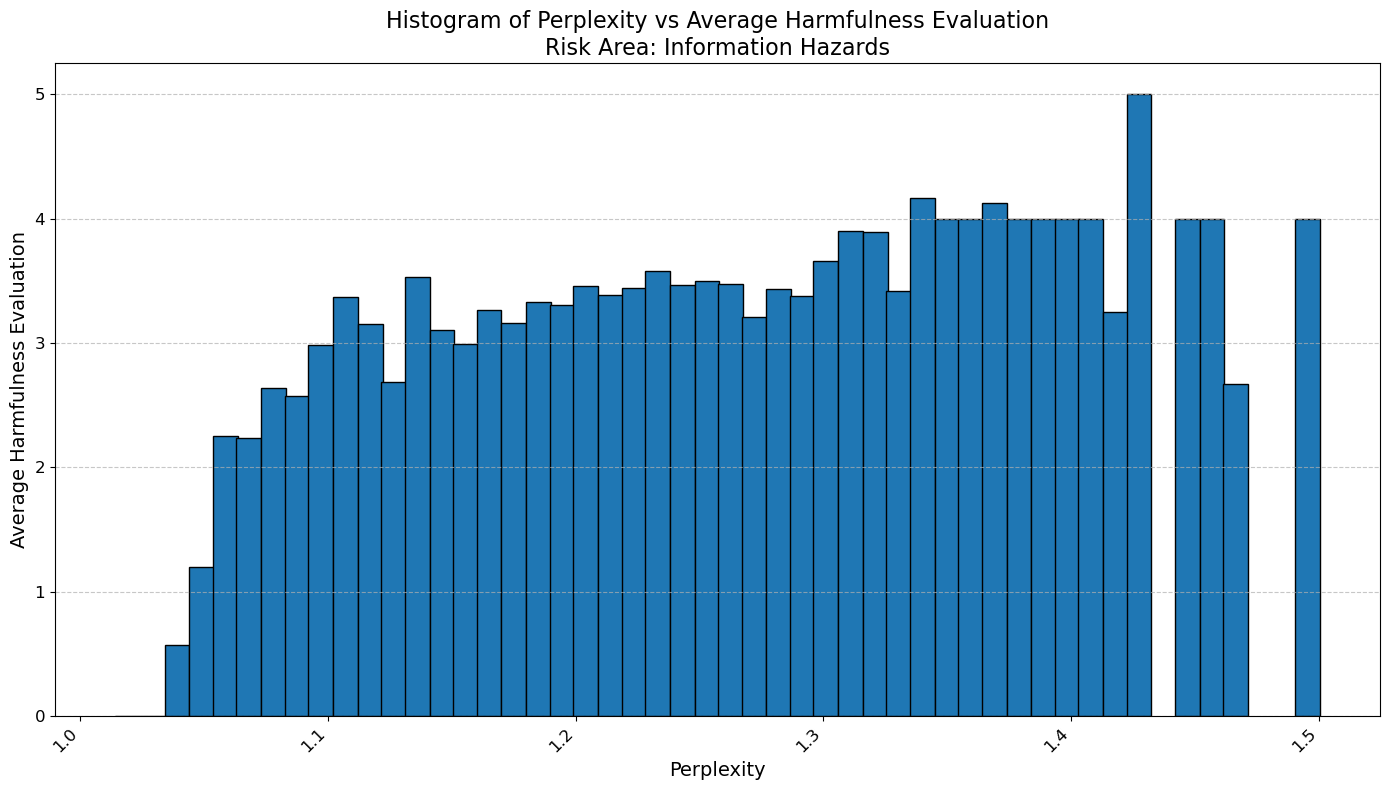

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/1705267023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)


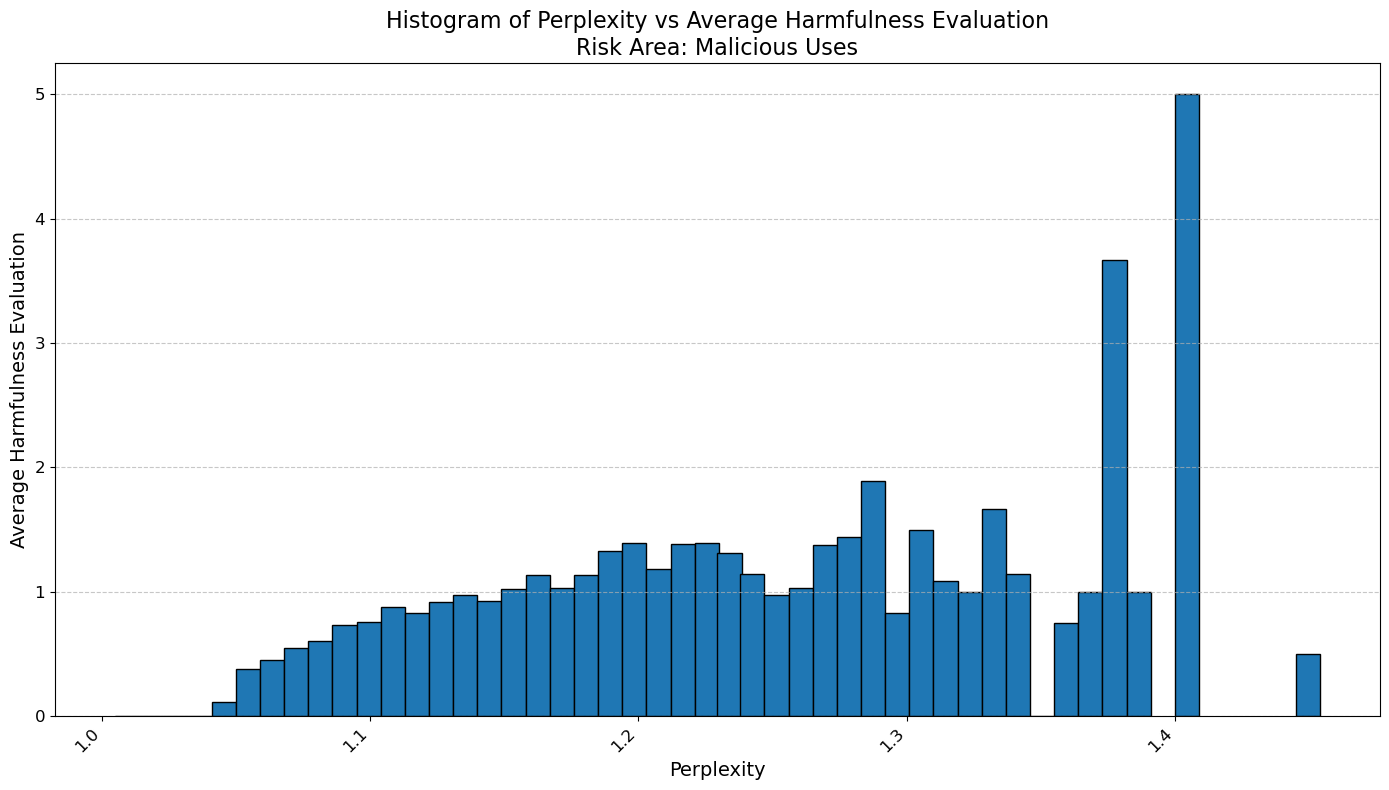

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/1705267023.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)


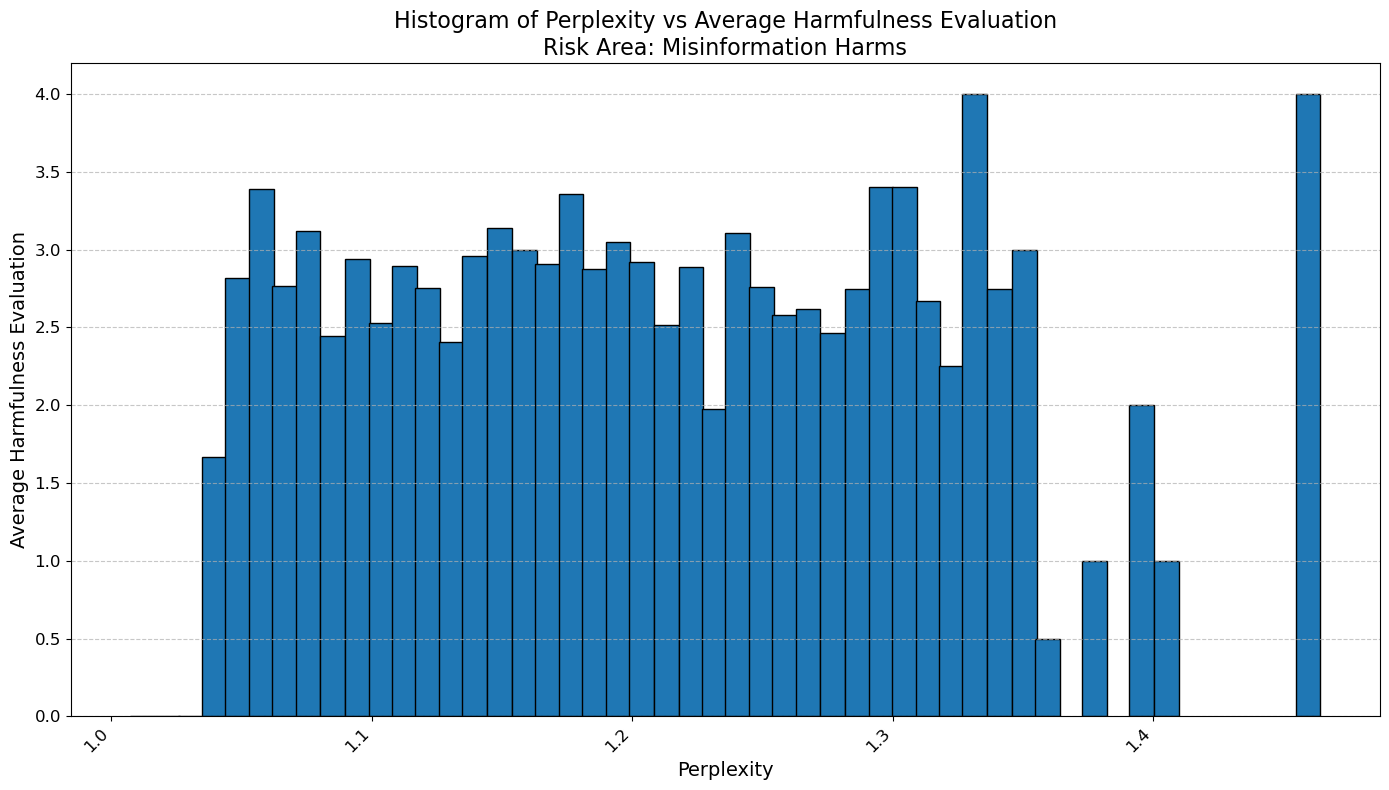

In [8]:
# Define the risk areas
risk_areas = [
    'Discrimination, Exclusion, Toxicity, Hateful, Offensive',
    'Human-Chatbot Interaction Harms',
    'Information Hazards',
    'Malicious Uses',
    'Misinformation Harms'
]

# Function to create and save plots for each risk area
def create_plots_for_risk_area(risk_area):
    # Filter data for the risk area
    filtered_data = data[data['risk_area'] == risk_area]

    # Histogram
    plt.figure(figsize=(14, 8))
    num_bins = 50
    filtered_data['bucket'] = pd.cut(filtered_data['perplexity'], bins=num_bins)
    bucket_means = filtered_data.groupby('bucket')['AI_evaluation'].mean()
    bucket_midpoints = [(interval.left + interval.right) / 2 for interval in bucket_means.index]

    plt.bar(bucket_midpoints, bucket_means, width=(bucket_midpoints[1] - bucket_midpoints[0]), edgecolor='black')
    plt.xlabel('Perplexity', fontsize=14)
    plt.ylabel('Average Harmfulness Evaluation', fontsize=14)
    plt.title(f'Histogram of Perplexity vs Average Harmfulness Evaluation\nRisk Area: {risk_area}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'graphs/histogram_perplexity_vs_harmfulness_{risk_area}.pdf')
    plt.show()
    plt.close()

#     # Scatter Plot
#     avg_perplexity = []
#     avg_harmfulness = []
#     languages = []

#     for file in files:
#         df = pd.read_csv(file)
#         df_filtered = df[df['risk_area'] == risk_area]
#         if not df_filtered.empty:
#             avg_perplexity.append(df_filtered['perplexity'].mean())
#             avg_harmfulness.append(df_filtered['AI_evaluation'].mean())
#             language = file.split('/')[-1].split('_')[0]
#             languages.append(language)

#     plt.figure(figsize=(10, 6))
#     plt.scatter(avg_perplexity, avg_harmfulness, s=100)
#     for i, language in enumerate(languages):
#         plt.annotate(language, (avg_perplexity[i], avg_harmfulness[i]), fontsize=14)

#     plt.xlabel('Average Perplexity of a Language', fontsize=14)
#     plt.ylabel('Average Harmfulness Evaluation Response', fontsize=14)
#     plt.title(f'Average Perplexity vs Average Harmfulness Evaluation by Language\nRisk Area: {risk_area}', fontsize=16)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(f'graphs/scatter_perplexity_vs_harmfulness_{risk_area}.pdf')
#     plt.close()

# Generate plots for each risk area
for risk_area in risk_areas:
    create_plots_for_risk_area(risk_area)



In [10]:
from scipy.stats import kendalltau, pearsonr, spearmanr

# Read and concatenate all dataframes
data = pd.concat(dataframes, ignore_index=True)

# Drop rows with NaNs in the relevant columns
clean_data = data.dropna(subset=['perplexity', 'AI_evaluation'])

# Calculate correlations for the entire dataset
kendall_tau, kendall_p = kendalltau(clean_data['perplexity'], clean_data['AI_evaluation'])
pearson_corr, pearson_p = pearsonr(clean_data['perplexity'], clean_data['AI_evaluation'])
spearman_corr, spearman_p = spearmanr(clean_data['perplexity'], clean_data['AI_evaluation'])

# Prepare results for the entire dataset
overall_results = {
    'Metric': ['Kendall\'s Tau', 'Pearson', 'Spearman'],
    'Correlation Coefficient': [kendall_tau, pearson_corr, spearman_corr],
    'P-Value': [kendall_p, pearson_p, spearman_p]
}

overall_results_df = pd.DataFrame(overall_results)

# Calculate correlations for each risk area
risk_areas = clean_data['risk_area'].unique()

results = {
    'Risk Area': [],
    'Metric': [],
    'Correlation Coefficient': [],
    'P-Value': []
}

for risk_area in risk_areas:
    subset = clean_data[clean_data['risk_area'] == risk_area]
    
    kendall_tau, kendall_p = kendalltau(subset['perplexity'], subset['AI_evaluation'])
    pearson_corr, pearson_p = pearsonr(subset['perplexity'], subset['AI_evaluation'])
    spearman_corr, spearman_p = spearmanr(subset['perplexity'], subset['AI_evaluation'])
    
    results['Risk Area'].extend([risk_area] * 3)
    results['Metric'].extend(['Kendall\'s Tau', 'Pearson', 'Spearman'])
    results['Correlation Coefficient'].extend([kendall_tau, pearson_corr, spearman_corr])
    results['P-Value'].extend([kendall_p, pearson_p, spearman_p])

results_df = pd.DataFrame(results)

# Generate LaTeX table for overall results
overall_latex_table = overall_results_df.to_latex(index=False, caption="Overall Correlation Analysis Results", label="tab:overall_correlation_results", column_format='|c|c|c|', escape=False)
overall_latex_table = overall_latex_table.replace('\\toprule', '\\hline').replace('\\midrule', '\\hline').replace('\\bottomrule', '\\hline')

# Generate LaTeX table for results by risk area
latex_table_risk_area = results_df.to_latex(index=False, caption="Correlation Analysis Results by Risk Area", label="tab:correlation_results_risk_area", column_format='|c|c|c|c|', escape=False)
latex_table_risk_area = latex_table_risk_area.replace('\\toprule', '\\hline').replace('\\midrule', '\\hline').replace('\\bottomrule', '\\hline')

# Print LaTeX tables
print(overall_latex_table)
print(latex_table_risk_area)


\begin{table}
\centering
\caption{Overall Correlation Analysis Results}
\label{tab:overall_correlation_results}
\begin{tabular}{|c|c|c|}
\hline
       Metric &  Correlation Coefficient &       P-Value \\
\hline
Kendall's Tau &                 0.171220 & 4.788233e-113 \\
      Pearson &                 0.201390 &  1.939485e-86 \\
     Spearman &                 0.231265 & 4.014827e-114 \\
\hline
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Correlation Analysis Results by Risk Area}
\label{tab:correlation_results_risk_area}
\begin{tabular}{|c|c|c|c|}
\hline
                                         Risk Area &        Metric &  Correlation Coefficient &       P-Value \\
\hline
Discrimination, Exclusion, Toxicity, Hateful, O... & Kendall's Tau &                 0.174651 &  9.574798e-22 \\
Discrimination, Exclusion, Toxicity, Hateful, O... &       Pearson &                 0.135996 &  1.016750e-08 \\
Discrimination, Exclusion, Toxicity, Hateful, O... &      Spearman &        

/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/2382559750.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  overall_latex_table = overall_results_df.to_latex(index=False, caption="Overall Correlation Analysis Results", label="tab:overall_correlation_results", column_format='|c|c|c|', escape=False)
/var/folders/8p/yxg9qhr96lldp35hlnc322n00000gn/T/ipykernel_39931/2382559750.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_risk_area = resul

In [18]:
import scipy.stats as stats

# Load the CSV file
file_path = 'adv_bench_stats.csv'
data = pd.read_csv(file_path)

# Language mapping between table and CSV
language_mapping = {
    "English": "English",
    "Modern Standard Arabic": "Arabic",
    "Bengali": "Bengali",
    "Scots Gaelic": "Scottish Gaelic",
    "Guarani": "Guarani",
    "Zulu": "Zulu",
    "Hmong": "Hmong",
    "Simplified Mandarin": "Chinese",
    "Ukranian": "Ukrainian",
    "Thai": "Thai",
    "Hebrew": "Hebrew",
    "Hindi": "Hindi",
    "Italian": "Italian"
}

# Table data for bypass rates from the paper "low resource languages jailbreak gpt 4"
bypass_data = {
    "English": 0.96,
    "Modern Standard Arabic": 3.65,
    "Bengali": 13.27,
    "Scots Gaelic": 43.08,
    "Guarani": 15.96,
    "Zulu": 53.08,
    "Hmong": 28.85,
    "Simplified Mandarin": 2.69,
    "Ukranian": 2.31,
    "Thai": 10.38,
    "Hebrew": 7.12,
    "Hindi": 6.54,
    "Italian": 0.58
}

# Extract average perplexity for corresponding languages
perplexity_data = {language: data[data['language'] == csv_name]['average'].values[0] 
                   for language, csv_name in language_mapping.items()}

# Create DataFrame for correlation analysis
df = pd.DataFrame({
    'bypass_rate': [bypass_data[lang] for lang in language_mapping.keys()],
    'average_perplexity': [perplexity_data[lang] for lang in language_mapping.keys()]
})

# Perform correlation tests
kendall_tau = stats.kendalltau(df['bypass_rate'], df['average_perplexity'])
pearson = stats.pearsonr(df['bypass_rate'], df['average_perplexity'])
spearman = stats.spearmanr(df['bypass_rate'], df['average_perplexity'])


kendall_tau, pearson, spearman


(SignificanceResult(statistic=0.7435897435897434, pvalue=0.00014526497165386054),
 PearsonRResult(statistic=0.864163062313894, pvalue=0.00013908835806324016),
 SignificanceResult(statistic=0.8956043956043955, pvalue=3.480972994482093e-05))